In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
#loading the data
city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")

#sum(city_data["type"] == "Rural")

#combining the data into one df
pyberDataDf = pd.merge(city_data, ride_data, on=["city","city"], how="left")

#separating data by city type
urbanCitiesDf = pyberDataDf[pyberDataDf["type"]=="Urban"]
suburbanCitiesDf = pyberDataDf[pyberDataDf["type"]=="Suburban"]
ruralCitiesDf = pyberDataDf[pyberDataDf["type"]=="Rural"]
urbanCitiesDf.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [2]:
#getting the number of rides for each city by each type of city
urbanRideCount = urbanCitiesDf.groupby(["city"]).count()["ride_id"]
suburbanRideCount = suburbanCitiesDf.groupby(["city"]).count()["ride_id"]
ruralRideCount = ruralCitiesDf.groupby(["city"]).count()["ride_id"]

#getting the average fare per city by type
urbanAvgFare = urbanCitiesDf.groupby(["city"]).mean()["fare"]
suburbanAvgFare = suburbanCitiesDf.groupby(["city"]).mean()["fare"]
ruralAvgFare = ruralCitiesDf.groupby(["city"]).mean()["fare"]

#average number of drivers per city by type
urbanDriverCount = urbanCitiesDf.groupby(["city"]).mean()["driver_count"]
suburbanDriverCount = suburbanCitiesDf.groupby(["city"]).mean()["driver_count"]
ruralDriverCount = ruralCitiesDf.groupby(["city"]).mean()["driver_count"]

Text(42, 35, 'Note: Circle size correlates to drivers per city.')

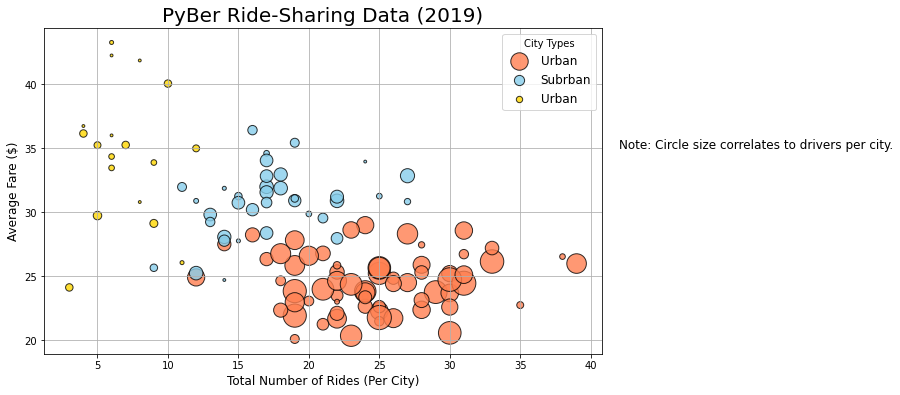

In [3]:
fig,ax = plt.subplots(figsize=(10,6))

#urban data
ax.scatter(urbanRideCount, urbanAvgFare, 
    s=8*urbanDriverCount, 
    edgecolors="black", 
    c="coral",
    alpha=0.8, label="Urban")
#suburban data
ax.scatter(suburbanRideCount, suburbanAvgFare, 
    s=8*suburbanDriverCount, 
    edgecolors="black", 
    c="skyblue",
    alpha=0.8, label="Subrban")
#rural data
ax.scatter(ruralRideCount, ruralAvgFare, 
    s=8*ruralDriverCount, 
    edgecolors="black", 
    c="gold",
    alpha=0.8, label="Urban")

#setting up graph labeling labels
ax.set_title("PyBer Ride-Sharing Data (2019)", fontsize=20)
ax.set_ylabel("Average Fare ($)", fontsize=12)
ax.set_xlabel("Total Number of Rides (Per City)", fontsize=12)
ax.grid(True)

#configuring the legend
ax.legend().legendHandles[0]._sizes = [75]
ax.legend().legendHandles[1]._sizes = [75]
ax.legend().legendHandles[2]._sizes = [75]
ax.legend().get_title().set_fontsize(12)
ax.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
ax.text(42,35, "Note: Circle size correlates to drivers per city.",fontsize=12)


In [4]:
#saving file 
#fig.savefig("analysis/Fig.png", bbox_inches="tight")

#create three dictionaries that contain the central tendancies (mean,median,modes)
urbanRideCountCT = {
    "mean" : np.mean(urbanRideCount),
    "median": np.median(urbanRideCount),
    "mode" : sts.mode(urbanRideCount)    
}

suburbanRideCountCT = {
    "mean" : np.mean(suburbanRideCount),
    "median": np.median(suburbanRideCount),
    "mode" : sts.mode(suburbanRideCount)    
}
ruralRideCountCT = {
    "mean" : np.mean(ruralRideCount),
    "median": np.median(ruralRideCount),
    "mode" : sts.mode(ruralRideCount)    
}

In [5]:
#getting fares per city type in the same way as above
urban_fares = urbanCitiesDf["fare"]
rural_fares = ruralCitiesDf["fare"]
suburban_fares = suburbanCitiesDf["fare"]

urbanFareCT = {
    "mean" : np.mean(urban_fares),
    "median" : np.median(urban_fares),
    "mode" : sts.mode(urban_fares)
}
suburbanFareCT = {
    "mean" : np.mean(suburban_fares),
    "median" : np.median(suburban_fares),
    "mode" : sts.mode(suburban_fares)
}
ruralFareCT = {
    "mean" : np.mean(rural_fares),
    "median" : np.median(rural_fares),
    "mode" : sts.mode(rural_fares)
}

In [6]:
print(urbanFareCT, suburbanFareCT, ruralFareCT)

{'mean': 24.52577230769231, 'median': 24.64, 'mode': ModeResult(mode=array([22.86]), count=array([5]))} {'mean': 30.970128000000003, 'median': 30.75, 'mode': ModeResult(mode=array([17.99]), count=array([3]))} {'mean': 34.623439999999995, 'median': 37.05, 'mode': ModeResult(mode=array([37.05]), count=array([2]))}


In [7]:
#now we are going to focus on drivers per city type
urbanDrivers = urbanCitiesDf["driver_count"]
suburbanDrivers = suburbanCitiesDf["driver_count"]
ruralDrivers = ruralCitiesDf["driver_count"]

#getting the central tendancies of each city type
urbanDriversCT = {
    "mean" : np.mean(urbanDrivers),
    "median" : np.median(urbanDrivers),
    "mode" : sts.mode(urbanDrivers)
}
suburbanDriversCT = {
    "mean" : np.mean(suburbanDrivers),
    "median" : np.median(suburbanDrivers),
    "mode" : sts.mode(suburbanDrivers)
}
ruralDriversCT = {
    "mean" : np.mean(ruralDrivers),
    "median" : np.median(ruralDrivers),
    "mode" : sts.mode(ruralDrivers)
}
print(urbanDriversCT, suburbanDriversCT, ruralDriversCT)

{'mean': 36.67815384615385, 'median': 37.0, 'mode': ModeResult(mode=array([39]), count=array([86]))} {'mean': 13.712, 'median': 16.0, 'mode': ModeResult(mode=array([20]), count=array([79]))} {'mean': 4.296, 'median': 4.0, 'mode': ModeResult(mode=array([1]), count=array([32]))}


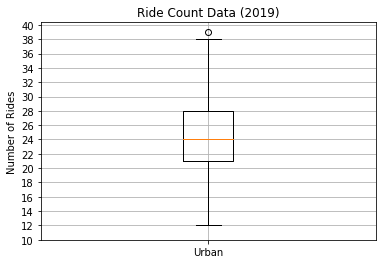

In [8]:
#plotting the rider information on a box-and-whisper plot
x_labels = ["Urban"]
fix,ax = plt.subplots()
ax.boxplot(urbanRideCount, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

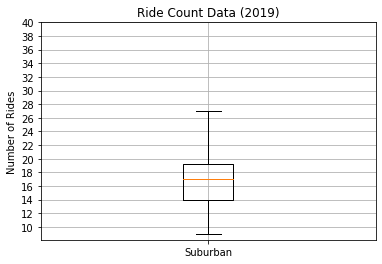

In [9]:
x_labels = ["Suburban"]
fix,ax = plt.subplots()
ax.boxplot(suburbanRideCount, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

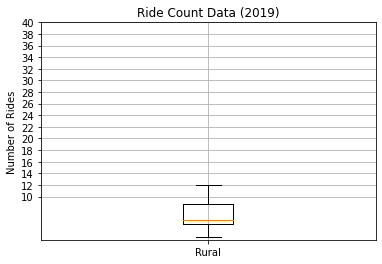

In [10]:
x_labels = ["Rural"]
fix,ax = plt.subplots()
ax.boxplot(ruralRideCount, labels=x_labels,)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

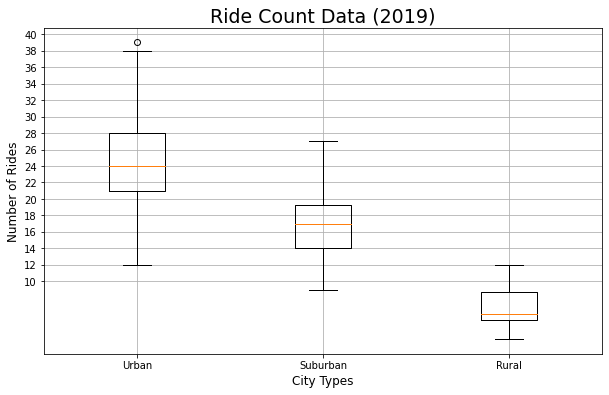

In [11]:
#to put all three boxplots on one graph:
x_labels = ["Urban", "Suburban", "Rural"]
rideCountData = [urbanRideCount, suburbanRideCount, ruralRideCount]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=19)
ax.set_ylabel('Number of Rides', fontsize=12)
ax.set_xlabel('City Types', fontsize=12)
ax.boxplot(rideCountData, labels=x_labels)
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

fig.savefig("analysis/Fig2.png")

In [12]:
#finding the urban outlier
urbanCityOutlier = urbanRideCount[urbanRideCount == 39].index[0]
urbanCityOutlier

'West Angela'

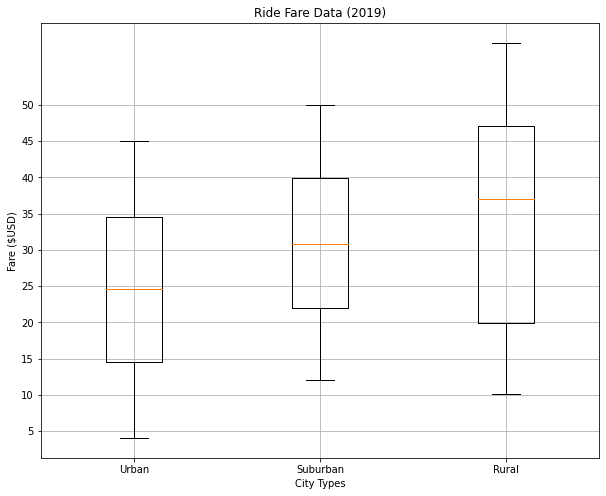

In [13]:
#getting three boxplots for the ride fare
x_labels = ["Urban", "Suburban", "Rural"]
rideFareData = [urban_fares, suburban_fares, rural_fares]
fig,ax=plt.subplots(figsize=(10,8)) 
ax.set_title("Ride Fare Data (2019)")
ax.set_xlabel("City Types")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
ax.boxplot(rideFareData, labels=x_labels)
plt.show()
fig.savefig("analysis/Fig3.png")

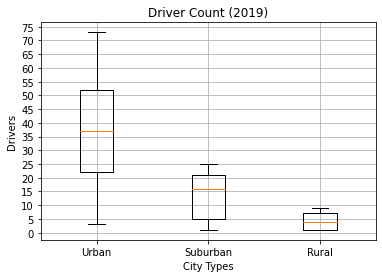

In [14]:
#driver count boxplots
driverData = [urbanDrivers, suburbanDrivers, ruralDrivers]
x_labels = ["Urban", "Suburban", "Rural"]
fig,ax = plt.subplots()
ax.set_title("Driver Count (2019)")
ax.set_xlabel("City Types")
ax.set_ylabel("Drivers")
ax.set_yticks(np.arange(0,90,step=5))
ax.grid()
ax.boxplot(driverData, labels=x_labels)

fig.savefig("analysis/Fig4.png")

to create a pie chart of the percent of fares by city, we need to get the total fares collected per city type, the sum of all fares, and the proportion of each type to the total

In [23]:
faresByType = pyberDataDf.groupby(["type"]).sum()["fare"]
totalFares = faresByType.sum()

#the dictionary way
farePercentagesDict = {
    "Urban" : faresByType["Urban"]/totalFares * 100,
    "Suburban" : faresByType["Suburban"]/totalFares * 100,
    "Rural" : faresByType["Rural"]/totalFares * 100
}

#the series way
farePercentages = 100 * pyberDataDf.groupby(["type"]).sum()["fare"]/pyberDataDf["fare"].sum()
farePercentages


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

To create a pie chart with the plt.pie() function, we need an array that contains the values and labels we are plotting.


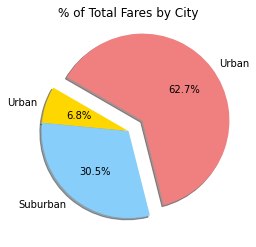

In [39]:
pie_labels = ["Urban", "Suburban", "Urban"]
plt.pie(farePercentages, labels=pie_labels, 
    shadow=True,
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0,0,0.2],
    autopct='%1.1f%%',
    startangle=150
    )
plt.title("% of Total Fares by City")
plt.savefig("analysis/Fig5.png")
plt.show()

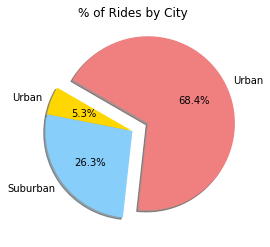

In [53]:
ridesByType = pyberDataDf.groupby(["type"]).count()["ride_id"]
totalRides = pyberDataDf["ride_id"].count()
typeRidePercentages = ridesByType / totalRides * 100
typeRidePercentages
plt.pie(typeRidePercentages, labels=pie_labels,
    shadow=True,
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0,0,0.2],
    autopct='%1.1f%%',
    startangle=150
)
plt.title("% of Rides by City")
plt.savefig("analysis/Fig6.png")
plt.show()

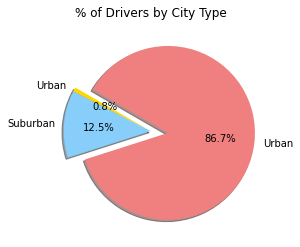

In [56]:
typeDriverPercentages = pyberDataDf.groupby(["type"]).sum()["driver_count"] / pyberDataDf["driver_count"].sum() * 100
plt.pie(typeDriverPercentages, labels=pie_labels,
    shadow=True,
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0,0,0.2],
    autopct='%1.1f%%',
    startangle=150
)
plt.title("% of Drivers by City Type")
plt.savefig("analysis/Fig7.png")
plt.show()